In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error ,r2_score
#Models
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, RidgeCV, Lasso
from sklearn.ensemble import GradientBoostingRegressor


import warnings
warnings.filterwarnings('ignore')

Import Cleaned Data


In [175]:
df=pd.read_csv("premierproject.csv",sep = ",")

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 71 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   LandSlope      1460 non-null   object 
 8   Condition1     1460 non-null   object 
 9   Condition2     1460 non-null   object 
 10  BldgType       1460 non-null   object 
 11  HouseStyle     1460 non-null   object 
 12  OverallQual    1460 non-null   int64  
 13  OverallCond    1460 non-null   int64  
 14  YearBuilt      1460 non-null   int64  
 15  YearRemodAdd   1460 non-null   int64  
 16  RoofStyle      1460 non-null   object 
 17  RoofMatl       1460 non-null   object 
 18  Exterior

Create Baseline model 

In [177]:
X=df.drop(["SalePrice"],axis=1)
Y=df["SalePrice"]

In [178]:
X1=df.select_dtypes("int64").drop(["SalePrice"],axis=1)
Y1=df["SalePrice"]

In [179]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X1,Y1,test_size=0.3,random_state=1)

In [180]:
y_mean = y_train.mean()
y_mean

181438.53424657535

In [181]:
y_pred_baseline = [y_mean] * len(y_train)

Calculate Baseline MAE

In [182]:
baseline_mae = mean_absolute_error(y_train,y_pred_baseline)
print("Mean apt price:", round(y_mean,2))
print("Baseline MAE:", round(baseline_mae,2))

Mean apt price: 181438.53
Baseline MAE: 56108.37


In [183]:
##Model Pipe line
pipeline = {
    'Linear Regression'  : LinearRegression(),
    'Gradient Boosting Regressor' : GradientBoostingRegressor(),
    'Ridge Regression' : RidgeCV(alphas = 10),
    'XGBoost Regression' : XGBRegressor(objective ='reg:squarederror',n_estimators = 4000, learning_rate = 0.005, max_depth = 5, colsample_bytree = 0.3, gamma = 0),
    'Lasso Regreesion' : Lasso(alpha = 0.001, random_state=1)
}

### Select features for models

In [194]:
## Pipeline_engine
def model_train_results(name,model,x_train,x_test,y_train,y_test):

    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    
    acc = mean_absolute_error(y_test,y_pred)
    print("Mean absolute Error: ",acc)
    
    r2 = r2_score(y_test,y_pred)
    print("R2_Score :",r2*100)
    
   
    ##Plotting
    plt.figure(figsize=(7,4))
    plt.xlabel("Y_test")
    plt.ylabel("Y_predicted")
    plt.title(f"{name} fit Line")
    plt.scatter(y_test,y_pred,marker = "s")
    plt.plot([0,600000],[0,600000],c = "black")
    plt.show()

Name of The Model Training : Linear Regression
Mean absolute Error:  21162.3684193817
R2_Score : 83.82954666614877


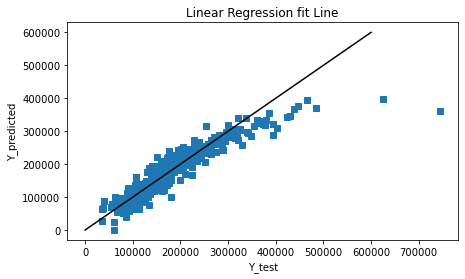

Name of The Model Training : Gradient Boosting Regressor
Mean absolute Error:  15817.175117933582
R2_Score : 92.14391456004117


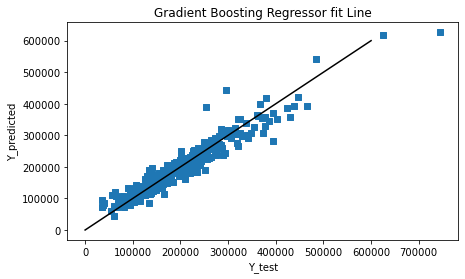

Name of The Model Training : Ridge Regression
Mean absolute Error:  20979.247441200783
R2_Score : 83.89106376259433


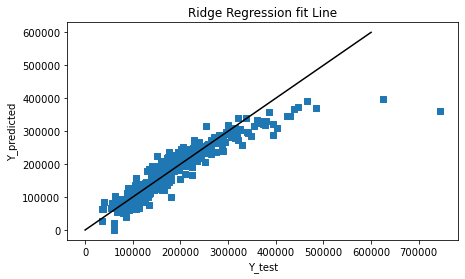

Name of The Model Training : XGBoost Regression


In [ ]:
## Prediction and Resultant Scores
for name,model in pipeline.items():
    print("Name of The Model Training :",name)
    model_train_results(name,model,x_train,x_test,y_train,y_test)